In [ ]:
alle stappen data science project hoe naar productie hoe versie control 

https://towardsdatascience.com/structure-your-answers-for-case-study-questions-during-data-science-interviews-a14a02d21e6c

https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb

Interesante boek data science project flow:

https://worldpece.org/sites/default/files/datastyle.pdf

zowel tekst als tijdserie data doen


## Pandas exercises

https://github.com/guipsamora/pandas_exercises/blob/master/09_Time_Series/Investor_Flow_of_Funds_US/Exercises_with_code_and_solutions.ipynb

# Project voorbeeld

https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb

Required libraries

In [ ]:
If you don't have Python on your computer, you can use the Anaconda Python distribution to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

NumPy: Provides a fast numerical array structure and helper functions.

pandas: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.

scikit-learn: The essential Machine Learning package in Python.

matplotlib: Basic plotting library in Python; most other Python plotting libraries are built on top of it.

Seaborn: Advanced statistical plotting library.

watermark: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

To make sure you have all of the packages you need, install them with conda:

conda install numpy pandas scikit-learn matplotlib seaborn

conda install -c conda-forge watermark

conda may ask you to update some of them if you don't have the most recent version. Allow it to do so.

Note: I will not be providing support for people trying to run this notebook outside of the Anaconda Python distribution.

The problem domain

For the purposes of this exercise, let's pretend we're working for a startup that just got funded to **create a smartphone app that automatically identifies species of flowers from pictures taken on the smartphone**. We're working with a moderately-sized team of data scientists and will be building part of the data analysis pipeline for this app.

We've been tasked by our company's Head of Data Science to **create a demo machine learning model that takes four measurements from the flowers (sepal length, sepal width, petal length, and petal width) and identifies the species based on those measurements alone**.

## Step 1 Answering the questions

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

**Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?**

We arer trying to classify flower species based on the four measurements we have

**Did you define the metric for success before beginning**

We can use accuracy, if the data is balanced

**Did you understand the context for the question and the scientific or business application?**

Building ml pipeline to classify flowers

**Did you record the experimental design?**

Our company's Head of Data has told us that the field researchers are hand-measuring 50 randomly-sampled flowers of each species using a standardized methodology. The field researchers take pictures of each flower they sample from pre-defined angles so the measurements and species can be confirmed by the other field researchers at a later point. At the end of each day, the data is compiled and stored on a private company GitHub repository.

**Did you consider whether the question could be answered with the available data?**

The data set we currently have is only for three types of Iris flowers. The model built off of this data set will only work for those Iris flowers, so we will need more data to create a general flower classifier.

## Step 2 Checking the data

Generally, we're looking to answer the following questions:

Is there anything wrong with the data?

Are there any quirks with the data?

Do I need to fix or remove any of the data?

In [ ]:
# lets start by reading in the data
import pandas as pd

In [111]:
iris_data = pd.read_csv('iris-data.csv')

In [ ]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We're in luck! The data seems to be in a usable format.

The first row in the data file defines the column headers, and the headers are descriptive enough for us to understand what each column represents. The headers even give us the units that the measurements were recorded in, just in case we needed to know at a later point in the project.

Each row following the first row represents an entry for a flower: four measurements and one class, which tells us the species of the flow

### Missing data

One of the first things we should look for is missing data. Thankfully, the field researchers already told us that they put a 'NA' into the spreadsheet when they were missing a measurement.

We can tell pandas to automatically identify missing values if it knows our missing value marke

In [ ]:
iris_data = pd.read_csv('iris-data.csv',na_values='NA')

Voilà! Now pandas knows to treat rows with 'NA' as missing values.

Next, it's always a good idea to look at the distribution of our data — especially the outliers.

**Let's start by printing out some summary statistics about the data set.**

In [ ]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We kunnen zien dat petal_width_cm ontbrekende data heeft

It's usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

Next, let's create a **scatterplot matrix**. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

We can even have the plotting package color each entry by its class to look for trends within the classes

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


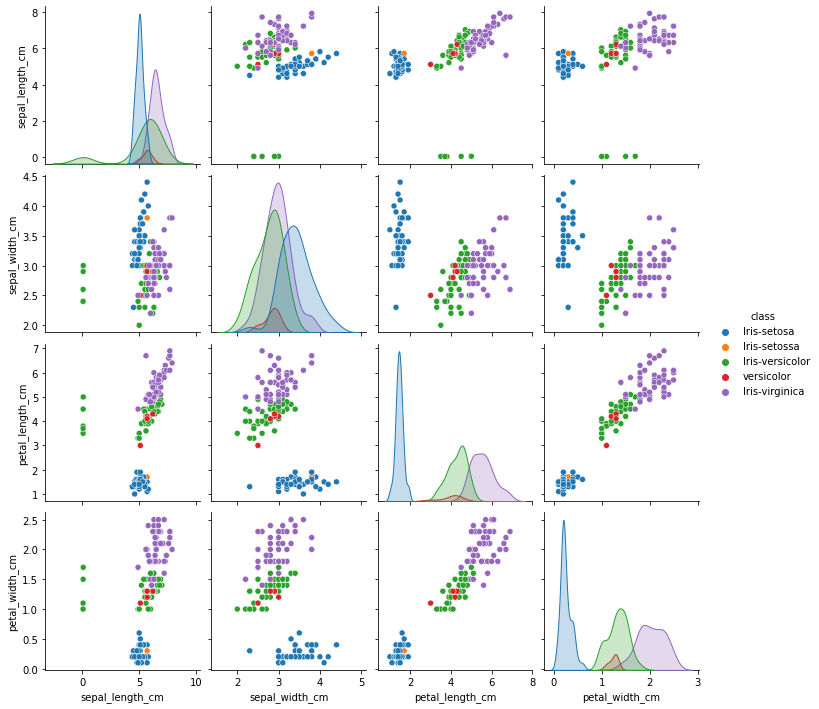

In [ ]:
# first we drop na values
sb.pairplot(iris_data.dropna(),hue='class', kind='scatter')

We can see some issues:

1. there are 5 classes when there should be 3

2. outliers vb sepal_width voor iris_setosa

3. some iris-versicolar are zero

we need to figure out what to do with the erroneous data.

## Tidy the data

In [ ]:
Let's use the DataFrame to fix these errors.

In [ ]:
iris_data.loc[:,['class']]

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [ ]:
#rreplace werkt hier niet
#iris_data['class'] = iris_data['class'].str.replace('versicolor','Iris-versicolor')

In [ ]:
#iris_data['class'].apply(lambda x: x.replace('versicolor','Iris-versicolor'))

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [ ]:
#iris_data['class'].apply(lambda x: x.replace('Iris-setossa','Iris-setosa'))

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [107]:
iris_data.loc[iris_data['class'] == 'versicolor'] = 'Iris-versicolor'

In [108]:
iris_data.loc[iris_data['class'] == 'Iris-setossa'] = 'Iris-setosa'

In [109]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Outliers

Much better! Now we only have three class types. Imagine how embarrassing it would've been to create a model that used the wrong classes.

There are some clear outliers in the measurements that may be erroneous: one sepal_width_cm entry for Iris-setosa falls well outside its normal range, and several sepal_length_cm entries for Iris-versicolor are near-zero for some reason.

Fixing outliers can be tricky business. **It's rarely clear whether the outlier was caused by measurement error, recording the data in improper units, or if the outlier is a real anomaly**. For that reason, we should be judicious when working with outliers: if we decide to exclude any data, we need to make sure to document what data we excluded and provide solid reasoning for excluding that data. (i.e., "This data didn't fit my hypothesis" will not stand peer review.)

In the case of the one anomalous entry for Iris-setosa, let's say our field researchers know that it's impOiuossible for Iris-setosa to have a sepal width below 2.5 cm. Clearly this entry was made in error, and we're better off just scrapping the entry than spending hours finding out what happened.

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sepal_length_cm  150 non-null    object
 1   sepal_width_cm   150 non-null    object
 2   petal_length_cm  150 non-null    object
 3   petal_width_cm   145 non-null    object
 4   class            150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [110]:
# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]

TypeError: ignored

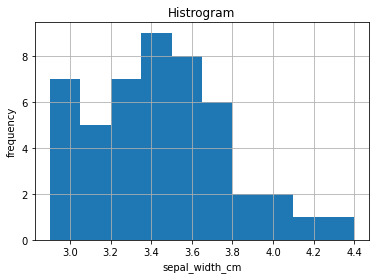

In [100]:
iris_data.loc[iris_data['class']=='Iris-setosa', 'sepal_width_cm'].hist()

plt.xlabel('sepal_width_cm')
plt.ylabel('frequency')
plt.title('Histrogram')

# show the plot
plt.show()

Excellent! Now all of our Iris-setosa rows have a sepal width greater than 2.5.

The next data issue to address is the several near-zero sepal lengths for the Iris-versicolor rows. Let's take a look at those rows.

In [105]:
iris_data.loc[(iris_data['class']== 'Iris-versicolor' ) & (iris_data['sepal_length_cm'] <1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor
